***Logistic Regression Prediction***

Ryan Thompson <br/>
Algorithms of Machine Learning <br/>  

*Using logistic regression in order to predict whether or not it will rain on a given day.*

**Import Libraries**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Main Function**
<br/>
Driver function. Data setup and function calls.

In [49]:
def main():
    days = load_data() # Setup data

    #bar_graph(days) # Show rainy days vs non-rainy days
    
    X = set_features(days) # Assigning feature data
    y = set_label(days) # Assigning label. This is the target for predictions

    # Splitting the data into training data and test data
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)

    logistic_reg = get_logistic() # Grabbing logistic regression model

    # Training the logistic regression model with training data
    logistic_reg.fit(X_train,y_train)

    # Making the predictions
    y_pred = logistic_reg.predict(X_test)
    # print(X_test)
    
    print("\nModel accuracy test:")
    model_test(y_test, y_pred)
    
    print("\nRunning test-runs:")
    will_it_rain(logistic_reg)

**Data Load**
<br/>
Uses pandas to load the rain.csv file into a usable format.

In [16]:
def load_data():
    # Column names from data(rain.csv)
    col_names = ['WindGustSpeedKmph', 'MaxTemp', 'MinTemp', 'CloudCover', 'TempC', 'label']
    # Days will be the dataset
    days = pd.read_csv("rain.csv", header=None, names=col_names, skiprows=[0])
    #print(days.head()) # Outputing the start of loaded dataset
    return days

print(load_data())

     WindGustSpeedKmph  MaxTemp  MinTemp  CloudCover  TempC  label
0                   13       24       13           9     24      0
1                   15       23       11          13     23      0
2                    6       22       12           5     22      0
3                   17       27       16           8     27      0
4                   11       29       17           6     29      0
..                 ...      ...      ...         ...    ...    ...
362                 14       33       18           0     33      0
363                 30       29       19           2     29      0
364                 14       17        5           0     17      0
365                 14       21        9           0     21      0
366                 12       26       12           0     26      0

[367 rows x 6 columns]


**Bar Graph**
<br/>
Displays the rainy days and non-rainy days in a bar graph

   WindGustSpeedKmph  MaxTemp  MinTemp  CloudCover  TempC  label
0                 13       24       13           9     24      0
1                 15       23       11          13     23      0
2                  6       22       12           5     22      0
3                 17       27       16           8     27      0
4                 11       29       17           6     29      0


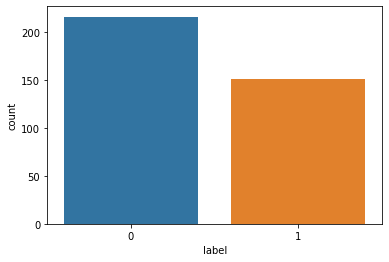

In [13]:
def bar_graph(days):
    sns.countplot(x="label", data=days)
    plt.show()
    
days = load_data()
bar_graph(days)

**Features VS Label**
<br/>
Setting the column names of the features and the label.

In [29]:
def set_features(days):
    feature_cols = ['WindGustSpeedKmph', 'MaxTemp', 'MinTemp', 'CloudCover', 'TempC']
    X = days[feature_cols] # Assigning features to X
    return X

def set_label(days):
    y = days.label # Setting Precipitation to be the label.
    return y

In [28]:
set_features(days)

,WindGustSpeedKmph,MaxTemp,MinTemp,CloudCover,TempC
0,13,24,13,9,24
1,15,23,11,13,23
2,6,22,12,5,22
3,17,27,16,8,27
4,11,29,17,6,29
...,...,...,...,...,...
362,14,33,18,0,33
363,30,29,19,2,29
364,14,17,5,0,17
365,14,21,9,0,21


In [27]:
set_label(days)

0      0
1      0
2      0
3      0
4      0
      ..
362    0
363    0
364    0
365    0
366    0
Name: label, Length: 367, dtype: int64

**Logistic Object**
<br/>
Sets up the Logistic Regression object model.

In [6]:
def get_logistic():
    logistic_reg = LogisticRegression(max_iter=5000)
    return logistic_reg

**Accuracy Test**
<br/>
Tests the ~accuracy of the model

In [47]:
def model_test(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("\tAccuracy: " +  str(accuracy))
    return accuracy

**Rain?**
<br/>
Plugging in values to make prediction of if it will rain or not. 
Convert output to a more human friendly version rather then just 0 or 1.

In [45]:
#  ['WindGustSpeedKmph', 'MaxTemp', 'MinTemp', 'CloudCover', 'TempC']
def will_it_rain(logistic_reg):
    # Dummy test-runs to predcit rainy days
    test_day_one =  [[5, 30, 15, 11, 22]]
    test_day_two =  [[15, 50, 30, 50, 32]]
    test_day_three =  [[0, 12, 0, 0, 10]]
    test_day_four =  [[45, 60, 10, 55, 33]]
    test_day_five = [[12, 20, 10, 5, 10]]

    # Predictions for test-runs
    prediction = []
    prediction.append(logistic_reg.predict(test_day_one))
    prediction.append(logistic_reg.predict(test_day_two))
    prediction.append(logistic_reg.predict(test_day_three))
    prediction.append(logistic_reg.predict(test_day_four))
    prediction.append(logistic_reg.predict(test_day_five))
    
    # Number of test-runs
    n = len(prediction)

    # Output if will rain or not in english
    for i in range(n):
        if(prediction[i] == 0):
            print("\tIt will not rain.")
        elif(prediction[i] == 1):
            print("\tRainy day. Sad.")
        else:
            print("\tSomething went wrong")
        # print(prediction)

Pushing the big red button

In [50]:
main()


Model accuracy test:
	Accuracy: 0.8913043478260869

Running test-runs:
	It will not rain.
	Rainy day. Sad.
	It will not rain.
	Rainy day. Sad.
	It will not rain.
